In [52]:
# import sys
# !{sys.executable} -m pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [28]:
# Code snippet from https://stackoverflow.com/questions/55049461/how-do-i-plot-k-mean-clustering-from-pandas
n = 1000
d = pd.DataFrame({
    # "x": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    # "y": [4, 6, 10, 8, 2, 12, 18, 24, 14, 16, 20, 32],
    # "x": np.random.randint(0, 100, n),
    # "y": np.random.randint(0, 100, n), 
    "x": ["m1", "m2", "m3", "m4", "m5", "m6", "m7", "m8", "m9"],
    "y": [1, 2, 3, 4, 5, 6, 7, 8, 9],
})

m = KMeans(3)
m.fit(d)

d["cl"] = m.labels_
d.plot.scatter("x", "y", c="cl", colormap="gist_rainbow")

AttributeError: 'KMeans' object has no attribute 'labels_'

KMeans(n_clusters=5)

In [67]:
# Referenced from https://realpython.com/k-means-clustering-python/
## Test using hardcoded data of Kintis methods' static analysis code metrics
data_1 = [ [1, 8], [1, 3], [1, 9], [1, 19], [1, 1], [1, 7], [1, 0], [1, 3], [1, 1], [1, 1], [1, 7], [1, 19] ]

scaler = StandardScaler()
scaled_feats = scaler.fit_transform(data_1)

d1_scaled_x = []
d1_scaled_y = []
for pair in scaled_feats:
    d1_scaled_x.append(pair[0])
    d1_scaled_y.append(pair[1])
    
df_1 = pd.DataFrame({
    "method" : d1_scaled_x,
    "mathOperationsQty" : d1_scaled_y,
})

In [75]:
kmeans_d1 = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans_d1.fit(df_1)

kmeans_d1.inertia_



km_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
    km_d1 = KMeans(n_clusters=k, **km_kwargs)
    km_d1.fit(df_1)
    sse.append(km_d1.inertia_)

silhouette_coeffs = []
for k in range(2, 11):
    km_d1 = KMeans(n_clusters=k, **km_kwargs)
    km_d1.fit(df_1)
    score = silhouette_score(df_1, km_d1.labels_)
    silhouette_coeffs.append(score)

C:\Users\steng\AppData\Local\Temp\ipykernel_42248\3367334765.py:24: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  km_d1.fit(df_1)
C:\Users\steng\AppData\Local\Temp\ipykernel_42248\3367334765.py:24: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  km_d1.fit(df_1)
C:\Users\steng\AppData\Local\Temp\ipykernel_42248\3367334765.py:24: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  km_d1.fit(df_1)
C:\Users\steng\AppData\Local\Temp\ipykernel_42248\3367334765.py:30: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  km_d1.fit(df_1)
C:\Users\steng\AppData\Local\Temp\ipykernel_42248\3367334765.py:30: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (

<AxesSubplot:xlabel='method', ylabel='mathOperationsQty'>

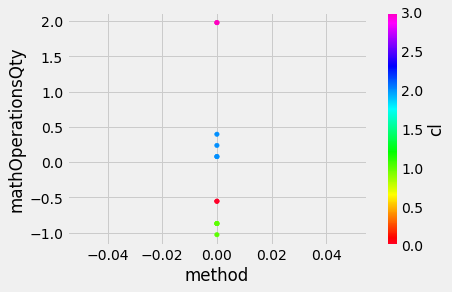

In [76]:
df_1["cl"] = kmeans_d1.labels_
df_1.plot.scatter("method", "mathOperationsQty", c="cl", colormap="gist_rainbow")

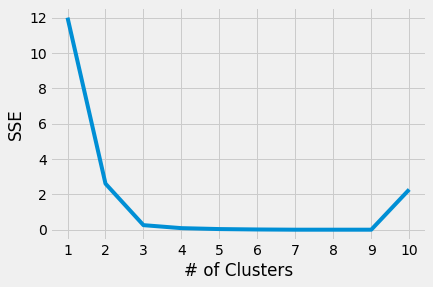

In [71]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("# of Clusters")
plt.ylabel("SSE")
plt.show()

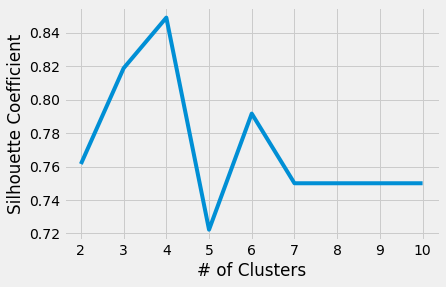

In [72]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coeffs)
plt.xticks(range(2, 11))
plt.xlabel("# of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()